In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/ajmof/OneDrive/Documents/UNCCHAR20180430DATA-Class-Repository-DATA/Rock_Hall-master/output/train.csv')

In [6]:
df.head()

,Unnamed: 0,Artist,Year Inducted,Years Waited,# of Years Nominated,Influenced,Certified Units (Millions),Albums in RS500,Top 100 Singles,Highest Position,Times on Cover of RS,Score,In_Out
0,0,The Beatles,1988.0,0,1,1230.0,178.0,10.0,80.0,1.0,16.0,4.81,1
1,1,Elvis Presley,1986.0,0,1,273.0,146.5,3.0,158.0,1.0,7.0,3.31,1
2,2,The Eagles,1998.0,0,1,17.0,120.0,2.0,21.0,1.0,3.0,3.50,1
3,3,Led Zeppelin,1995.0,0,1,355.0,111.5,5.0,10.0,4.0,12.0,4.50,1
4,4,Michael Jackson,2001.0,3,1,176.0,84.0,3.0,49.0,1.0,6.0,3.65,1


In [7]:
df.drop(['Unnamed: 0','Artist','Year Inducted'],axis=1,inplace=True)

In [8]:
df.head()

,Years Waited,# of Years Nominated,Influenced,Certified Units (Millions),Albums in RS500,Top 100 Singles,Highest Position,Times on Cover of RS,Score,In_Out
0,0,1,1230.0,178.0,10.0,80.0,1.0,16.0,4.81,1
1,0,1,273.0,146.5,3.0,158.0,1.0,7.0,3.31,1
2,0,1,17.0,120.0,2.0,21.0,1.0,3.0,3.50,1
3,0,1,355.0,111.5,5.0,10.0,4.0,12.0,4.50,1
4,3,1,176.0,84.0,3.0,49.0,1.0,6.0,3.65,1


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_data = scaler.transform(df)

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
x_pca = pca.transform(scaled_data)

In [16]:
scaled_data.shape

(359, 10)

In [17]:
x_pca.shape

(359, 2)

Text(0,0.5,'Second Principal Component')

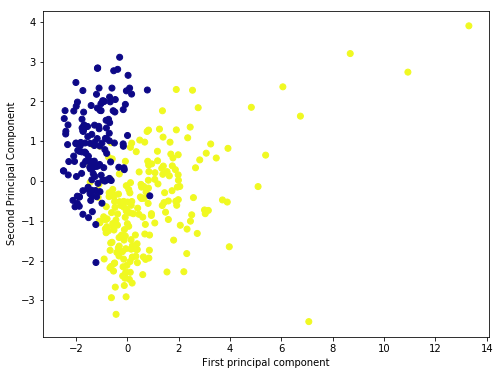

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['In_Out'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [21]:
pca.components_

array([[-0.34262739,  0.03990399,  0.38272816,  0.38140808,  0.4634394 ,
         0.26773619, -0.10880992,  0.41232573,  0.17181544,  0.30204269],
       [ 0.15842859, -0.3938538 ,  0.28406461, -0.02643268,  0.23567504,
        -0.43905477,  0.25492489,  0.10540916,  0.50067453, -0.4041084 ]])

In [26]:
df_comp = pd.DataFrame(pca.components_)

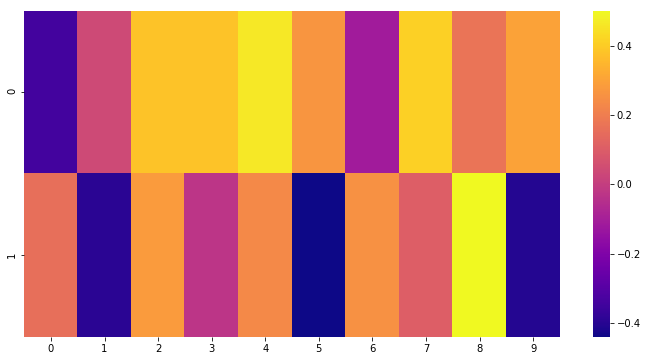

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)